In [2]:
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy==1.16.1

  Attempting uninstall: numpy
    Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accesso negato: 'c:\\users\\nosta\\desktop\\dev\\autonomous-exploration-agent\\.venv\\lib\\site-packages\\~umpy\\.libs\\libopenblas.BNVRK7633HSX7YVO2TADGR4A5KEKXJAW.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [109]:
df = pd.read_csv('../../experiments/performance.txt', sep=";", decimal=',')
df.columns = ["Experiments", "Targets", "Obstacles", "Duration", "Agents", "TPM", "CPM"]

In [111]:
df1 = df[['Experiments','TPM', 'CPM']]
df1.loc[:, 'CPT'] = df1.apply(lambda x: x['CPM']/x['TPM'], axis=1)
df1["Experiments"] = df1.apply(lambda x: x['Experiments'].title(), axis=1)

df2 = df1.melt(id_vars='Experiments', var_name="Performance", value_name="Value")


c:\users\nosta\desktop\dev\autonomous-exploration-agent\.venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


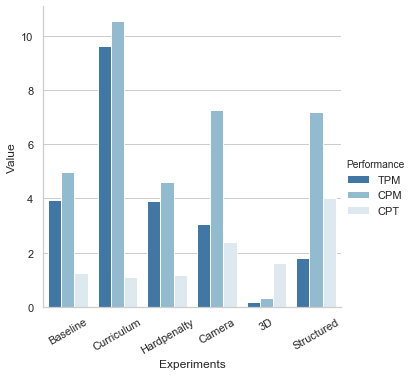

In [121]:
c = sns.catplot(x='Experiments', y='Value', hue='Performance', data=df2, kind='bar', palette=sns.color_palette("RdBu_r"))
c.set_xticklabels(rotation=30)

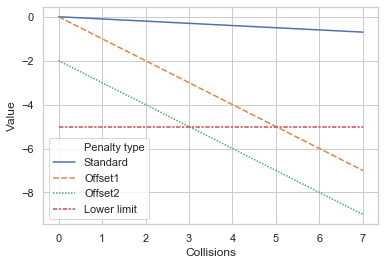

In [166]:
# Penalty graph
# First
x = np.linspace(0,7,100)
penalty1 = -0.1*x
pentalty2 = -x
pentalty3 = -(2+x)
lower = -5

data = pd.DataFrame({
    "Collisions": x,
    "Standard": penalty1,
    "Offset1": pentalty2,
    "Offset2": pentalty3,
    "Lower limit": lower
})

data = pd.melt(data, ['Collisions'])
data.columns = ["Collisions", "Penalty type", "Value"]

ax = sns.lineplot(x="Collisions", y='Value', hue='Penalty type', style="Penalty type",
             data=data)
plt.legend(loc='lower left')

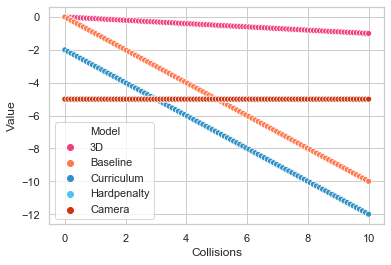

In [10]:
# For the legend
# First
x = np.linspace(0,10,100)
penalty1 = -0.1*x
pentalty2 = -x
pentalty3 = -(2+x)
lower = -5

data = pd.DataFrame({
    "Collisions": x,
    "3D": penalty1,
    "Baseline": pentalty2,
    "Curriculum": pentalty3,
    "Hardpenalty": lower,
    "Camera": lower,
})

data = pd.melt(data, ['Collisions'])
data.columns = ["Collisions", "Model", "Value"]

pal = ["#ef3f7f", "#ff794e", "#3090c7", "#4cc3f0", "#cc3311"]
ax = sns.scatterplot(x="Collisions", y='Value', hue='Model',
             data=data, palette=pal)
plt.legend(loc='lower left')